# Concreteness

Concrete words are words we whose meaning of based on direct experiences with reality, and abstracts words we learn and describe the meaning in terms of other words. Concreteness quantifies how much word refers to an object we can directly perceive.

**Possible Measures**

1. [2013 Word Pool](https://link.springer.com/article/10.3758/s13428-013-0403-5#Sec1) - This study used 4000 online participants to score `40,000 words` on a scale from 1-5 (abstract --> concrete).
   * Also has `3000` two-word expressions 
2. [Coh-Metrix](http://cohmetrix.memphis.edu/cohmetrixhome/documentation_indices.html#WRDCNCc) - This comes from the [MRC Psycholinguistic Database ](https://websites.psychology.uwa.edu.au/school/mrcdatabase/mrc2.html). 
   * `4000 words `given score betwen 100-700, based on merging norms from three  studies (Pavio, Colerado, and Gilhooly-Logie)
   * Missing scores for words like 'anesthetic' and 'gauze'

**Bysbaert Rating Instructions:**


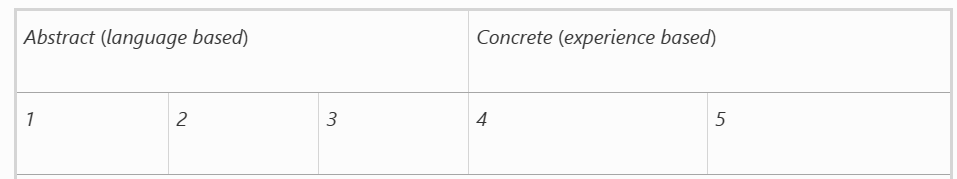

## (0) Load in Data

In [30]:
%%capture 
import pandas as pd
import numpy as np
import json
import string

passages = ["A1", "A2", "A3", "A4", "A5"]  
df = pd.DataFrame()

for pas_id in passages:
    pas_df = pd.read_excel("data\ListA_TextProperties.xlsx", sheet_name=pas_id).drop(columns=['concreteness_Brysbaert'], errors='ignore')
    df = pd.concat([df, pas_df], ignore_index= True)
df.head(1)

In [31]:
print(len(df["sentence"].to_list()))

100


## (1) 2013 Word Pool

Let's see what percent of words are immediately covered by the word pool.

In [32]:
# (0) Get a list of unique words used in each passage
passage_words = " ".join(df["sentence"])                            # Passage string
passage_words = passage_words.translate(str.maketrans('', '', string.punctuation))      # Removes punctuation
passage_words = passage_words.lower().split()                       # Turns lower case and to list
passage_words = list(set(passage_words))                            # Get unique words

# (1) Find % of words immediately covered by word pool
wrd_concreteness_df = pd.read_excel("data/Brysbaert_WRD_CNC.xlsx")
word_pool = wrd_concreteness_df["Word"].to_list()

num_words_in_word_pool = 0 
not_in_pool = []
for word in passage_words:
    if word in word_pool:
        num_words_in_word_pool += 1
    else:
        not_in_pool.append(word)

percent = num_words_in_word_pool / len(passage_words)

print("Percent of words in pool: {:.2f}".format(percent))
print(f"Missing words: {sorted(not_in_pool)}")

Percent of words in pool: 0.86
Missing words: ['18', '36', '9', 'abrasions', 'abscesses', 'areas', 'asking', 'assessments', 'avpu', 'bodies', 'burns', 'caused', 'causes', 'checking', 'checks', 'completing', 'contacted', 'contusions', 'cravats', 'damaged', 'dangers', 'drapes', 'dressings', 'endured', 'explosions', 'eyebrows', 'eyelashes', 'glasgow', 'includes', 'injuries', 'larger', 'limbs', 'millimeters', 'needed', 'nines', 'notes', 'objects', 'patients', 'pokes', 'prevents', 'problems', 'products', 'putting', 'responses', 'results', 'rinsed', 'scrubbing', 'sf600', 'sicknesses', 'signs', 'strikes', 'symptoms', 'temperatures', 'towels', 'treated', 'types', 'victims']


## (2) Coh-Metrix

* For each word in the texts, we will have to (1) create a file containing that word, (2) run those files it through coh-metrix, (3) see how many words in the resulting sheet have a non-zero word concreteness (*WRDCNCc, 97*) score

In [33]:
# (0) Run Code cell above first to get passage words!
# (1) Create files
for word in passage_words:
    with open(f"archive/coh-metrix_wrdcnc_input/{word}.txt", "w") as word_file:
        word_file.write(word)

# (2) Coh-metrix output
cohmetrix_cnc_df = pd.read_csv("archive/coh-metrix_wrdcnc_output.csv")
cohmetrix_cnc_df.head(1)
cohmetrix_cnc_df = cohmetrix_cnc_df[["TextID","WRDCNCc"]].rename(columns={"TextID":"Word", "WRDCNCc": "Concreteness" })
cohmetrix_cnc_df["Word"] = [word.split("\\")[-1][:-4].lower() for word in cohmetrix_cnc_df["Word"].to_list()]   # Cleans up word column

# (3) Find % of words immediately covered by word pool
percent = len(cohmetrix_cnc_df.query("Concreteness != 0")) / len(passage_words)
words_not_in_wordpool_df = cohmetrix_cnc_df[cohmetrix_cnc_df["Concreteness"] == 0]       # Drop alls words that do not have a score
not_in_pool = words_not_in_wordpool_df["Word"]
print("Percent of words in pool: {:.2f}".format(percent))
print(f"Missing words: {not_in_pool.to_list()}")



Percent of words in pool: 0.44
Missing words: ['18', '36', '600', '9', 'a', 'abrasion', 'abrasions', 'accessible', 'additional', 'adjacent', 'administered', 'after', 'airway', 'all', 'along', 'an', 'and', 'anesthesia', 'anesthetic', 'another', 'antibiotic', 'any', 'apply', 'applying', 'appropriate', 'are', 'around', 'ask', 'asking', 'assess', 'assessment', 'assessments', 'at', 'avpu', 'backward', 'because', 'before', 'begin', 'bleeding', 'both', 'burnt', 'by', 'calculated', 'can', 'casualty', 'casualtys', 'caution', 'characterized', 'check', 'checks', 'chemical', 'chemicals', 'coma', 'complete', 'completing', 'compress', 'confirming', 'consciousness', 'considered', 'contain', 'contusion', 'contusions', 'could', 'cravats', 'current', 'deformity', 'describe', 'details', 'determine', 'diameter', 'different', 'discoloration', 'do', 'dressings', 'dry', 'each', 'easily', 'electrical', 'elevate', 'elevated', 'ensure', 'entry', 'environment', 'excess', 'exit', 'explosions', 'exposed', 'extensi

## (3) Score Sentences

Now that we've found a measure of concreteness, we can calculate the average concreteness of words in each sentence.

**(Optional) Stopwords:**

* I could filter `'stop words'` from the scores (and transform each sentence into its 'key words'). I might want to do this if I want the scores to be a measure of how concrete the  nouns, adjectives, and verbs in a sentence are.
  * For example, let's say dual-encoding provided a good explanation of why concrete words are better recognized and remembered than abstract ones, that is because both a visual and verbal memory of concrete words are created. If stop words don't contribute to that visual memory, they aren't relevant in trying to quantify how much sentences is tied to a visual memory.

In [34]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords');

stopwords_mask = [word in stopwords.words('english') for word in passage_words]
stopwords = sorted(np.array(passage_words)[stopwords_mask])       # Find all the passage words that are stop words

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\elija\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Concreteness Function:** 
* A function that assigns a concreteness to any sentence

In [35]:
%%capture
def concreteness(item_string: str, word_pool: dict, equivalence_dict: dict = {}):
    """Computes the average concreteness of words in the sentence

    Args:
        item_string (str): 
            A sentence to compute concreteness of
        
        word_pool (dict[str, int]):
            Dictionary of (word, concreteness) pairs

        equivalence_dict (dict[str, str]):
            Dictionary mapping words to equivalent words in the word pool

    Returns:
        concreteness_score (int): 
            Average concreteness of words in the sentence

        missing_words (list): 
            List of words not in word pool
    """

    # (0) Clean up string -- change '%' -> 'percent', remove punctuation, lowercase letters
    item_string = item_string.replace("%"," percent")
    item_string = item_string.translate(str.maketrans('', '', string.punctuation))
    item_string = item_string.lower()

    # (1) Compute concreteness of each word in string
    concreteness_lst = []
    missing_words = []

    for word in item_string.split():

        if word in equivalence_dict:
            word = equivalence_dict[word]
        
        if word in word_pool: # and word not in stopwords: 
            concreteness_lst.append(word_pool[word])
        else:
            missing_words.append(word)

    concreteness = sum(concreteness_lst) / len(concreteness_lst)        # watch out for division by zero!

    return concreteness, missing_words


**Scoring:**
* Assign concreteness to each sentence in the texts

In [36]:
%%capture
# (1) Load in word pool and dictionary equivalent words
word_pool_df = pd.read_excel("data\Brysbaert_WRD_CNC.xlsx")[["Word", "Conc.M"]] 
word_pool = dict([(word, conc) for word, conc in zip(word_pool_df["Word"], word_pool_df["Conc.M"])])

with open("data\Brysbaert_WRD_CNC_equivalent_words.json","r") as dic:           
    equivalence_dict = json.load(dic)
    
# (2) Assign a concreteness to each sentence and save results
with pd.ExcelWriter("data/ListA_TextProperties.xlsx", mode="a", if_sheet_exists="replace") as writer:
    for pas_id in passages:
        pas_df = df.query(f"passage_id == '{pas_id}'")
        concreteness_column =  [concreteness(sentence, word_pool, equivalence_dict)[0] for sentence in pas_df.sentence]
        pas_df["concreteness_Brysbaert"] = concreteness_column
        pas_df = pas_df[["sentence", "rec_prob", "concreteness_Brysbaert"] + pas_df.columns[2:-1].to_list()]    
        pas_df.round(2).to_excel(writer, sheet_name=pas_id, index=False)  

**Sanity Check**
* Do these concreteness scores align with intuition?

| Input (List A) | Mean | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 | 13 | 14 | 15 | 16 | 17 | 18 | 19 | 20 | 
| -              | - | - | - | - | - | - | - | - | - | -  | -  | -  | -  | -  | -  | -  | -  | -  | -  | -  |  - |
| My prediction  | -  | 2.5 | 2.6 | 3.3 | 3 | 2.7 | 2.3 | 2.5 | 2.7 | 3 | 3.3  | 2.5 | 3  | 3  | 3.5  | 2.5  | 2.7  | 2.5  | 2  | 2 | 2.5  | 
| Computer Score | 2.7  | 2.5 | 2.9 | 3 | 2.8 | 3 | 2 | 2.4 | 2.2 | 3.2 | 3  | 2.3 | 3  | 3  | 3.2  | 2.6  | 2.6  | 2.5  | 2.3  | 2.1 | 2.5  |



| Input (List B) | Mean | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 | 13 | 14 | 15 | 16 | 17 | 18 | 19 | 20 | 
| -              | - | - | - | - | - | - | - | - | - | -  | -  | -  | -  | -  | -  | -  | -  | -  | -  | -  |  - |
| My prediction  | -  | 2.5 | 3.2 | 3.5 | 3.5 | 3.2 | 2.8 | 3 | 2.8 | 3 | 3.2  | 2.7 | 3  | 3.5  | 3.2  | 3  | 2.9  | 2.5  | 3  | 3 | 3  | 
| Computer Score | 3  | 2.4 | 2.9 | 3.3 | 3.1 | 3.1 | 2.6 | 2.9 | 2.2 | 3.2 | 3  | 2.3 | 3  | 3  | 3.2  | 2.6  | 2.6  | 2.5  | 2.3  | 2.1 | 2.5  |



## (4) Further Analysis and Comparison

##### **(0) Return to Categorical Data**

Let's group sentences together based on the concreteness rating they are closest to.

0
7
13
0
0
[0, 0.29714285714285715, 0.5384615384615384, 0, 0]


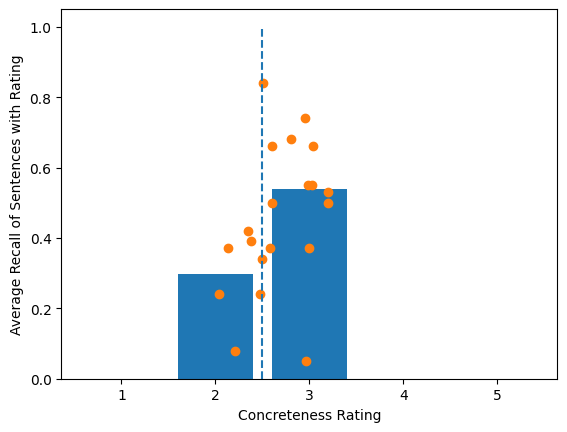

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_excel("data/ListA_TextProperties.xlsx", sheet_name="A1")

cnc_ratings = [1,2,3,4,5]
mean_recall = []
for rating in cnc_ratings:
    sentences_given_rating = df.query(f"-.5 < concreteness_Brysbaert - {rating} <= .5 ")
    print(len(sentences_given_rating))
    
    if len(sentences_given_rating) == 0:
        mean_recall.append(0)
    else: 
        mean_recall.append(sentences_given_rating.rec_prob.mean())

plt.bar(cnc_ratings, mean_recall)
plt.xlabel("Concreteness Rating")
plt.ylabel("Average Recall of Sentences with Rating");
plt.scatter(df.concreteness_Brysbaert, df.rec_prob)
plt.vlines(x=2.5,ymin=0, ymax=1,linestyles="dashed")
print(mean_recall)

##### **(1) Correlation between Measures**

Let's compare the two concreteness scores visually, and see which aligns more with intuition as well.

Correlation: 0.46


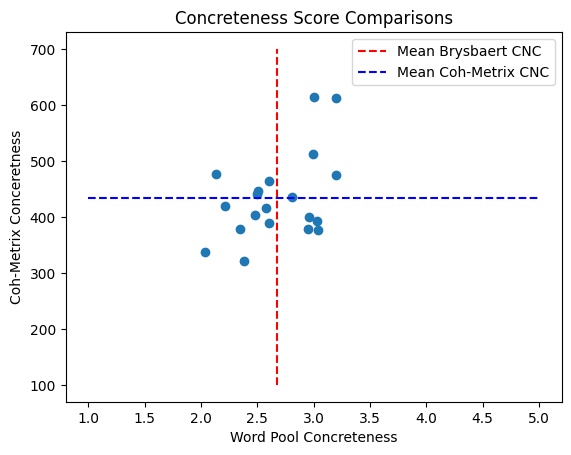

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("data/ListA_TextProperties.xlsx", sheet_name="A1")
plt.scatter(
    x= df.concreteness_Brysbaert,
    y= df.word_concreteness_cmx
)
plt.xlabel("Word Pool Concreteness")
plt.ylabel("Coh-Metrix Conceretness")
plt.title("Concreteness Score Comparisons")
mean_cnc_B = df.concreteness_Brysbaert.mean()
mean_cnc_C = df.word_concreteness_cmx.mean()
plt.vlines(x=mean_cnc_B, ymin=100, ymax = 700, colors=["r"], linestyles="dashed", label="Mean Brysbaert CNC")
plt.hlines(y=mean_cnc_C, xmin=1, xmax = 5, colors=["b"], linestyles="dashed", label="Mean Coh-Metrix CNC")
plt.legend()
correlation = df[["concreteness_Brysbaert", "word_concreteness_cmx"]].corr()["word_concreteness_cmx"]["concreteness_Brysbaert"]
print("Correlation: {:.2f}".format(correlation))

In [39]:
df.query(f"concreteness_Brysbaert > {mean_cnc_B} and word_concreteness_cmx < {mean_cnc_C}")
df.query(f"concreteness_Brysbaert < {mean_cnc_B} and word_concreteness_cmx > {mean_cnc_C}")

,sentence,rec_prob,concreteness_Brysbaert,arousal_Glasgow,sentence_length,word_length,word_frequency_cmx,word_concreteness_cmx,grade_level,input,paragraph,passage_id
0,Small and large abscesses may need to be treat...,0.84,2.51,4.50,10,1.50,2.14,446.33,6.01,1,1,A1
15,Take notes about the abscess and procedure on ...,0.66,2.60,4.12,9,1.44,2.31,465.00,4.96,16,4,A1
16,Describe the abscess prior to treatment.,0.34,2.50,3.86,6,1.67,1.76,440.50,6.42,17,4,A1
18,Describe how well the patient endured the proc...,0.37,2.13,4.26,8,1.62,1.99,477.00,6.70,19,4,A1


##### **(2) Distribution of Concreteness Scores**

Visualize how the concreteness scores are distributed (are there two groups?)


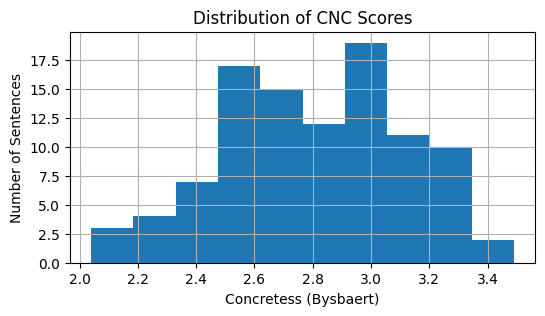

In [40]:
import matplotlib.pyplot as plt

passages = ["A1", "A2", "A3", "A4", "A5"]  
df = pd.DataFrame()
for pas_id in passages:
    pas_df = pd.read_excel("data\ListA_TextProperties.xlsx", sheet_name=pas_id)
    df = pd.concat([df, pas_df], ignore_index= True)

g = df["concreteness_Brysbaert"].hist(bins=10, figsize=(6,3))
plt.xlabel("Concretess (Bysbaert)")
plt.ylabel("Number of Sentences")
plt.title(f"Distribution of CNC Scores");

##### **(3) Memorability vs Concreteness**

Correlation: 0.19


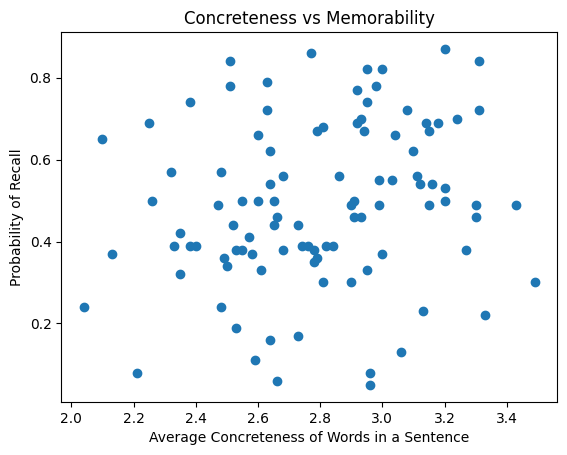

In [41]:
plt.scatter(df.concreteness_Brysbaert, df.rec_prob)
plt.xlabel("Average Concreteness of Words in a Sentence")
plt.ylabel("Probability of Recall")
plt.title("Concreteness vs Memorability");
correlation = df[["concreteness_Brysbaert", "rec_prob"]].corr()["rec_prob"]["concreteness_Brysbaert"]
print("Correlation: {:.2f}".format(correlation))




In [42]:
df.query("concreteness_Brysbaert < 3 and rec_prob > .6")

,sentence,rec_prob,concreteness_Brysbaert,arousal_Glasgow,sentence_length,word_length,word_frequency_cmx,word_concreteness_cmx,grade_level,input,paragraph,passage_id
0,Small and large abscesses may need to be treat...,0.84,2.51,4.50,10,1.50,2.14,446.33,6.01,1,1,A1
1,A small abscess is less than five millimeters ...,0.74,2.95,3.53,9,1.44,2.95,378.20,4.96,2,1,A1
3,Larger abscesses will need to be cut open to s...,0.68,2.81,4.63,11,1.36,2.07,435.33,4.80,4,1,A1
15,Take notes about the abscess and procedure on ...,0.66,2.60,4.12,9,1.44,2.31,465.00,4.96,16,4,A1
20,"To begin, find out cause and severity of casua...",0.74,2.38,4.40,10,1.60,1.92,376.00,7.19,1,1,A2
25,Now you must prepare to stop the burn process.,0.62,2.64,4.18,9,1.22,2.37,369.00,2.34,6,2,A2
27,"For electrical burns, turn off the electrical ...",0.69,2.92,4.99,8,1.88,1.54,424.50,9.65,8,2,A2
36,The percentage is calculated with the rule of ...,0.69,2.25,3.41,9,1.56,1.63,369.00,6.28,17,4,A2
41,"First, pull the eyelid away from the eyeball.",0.82,2.95,4.14,8,1.38,1.84,309.33,3.76,2,1,A3
42,Put a cotton swab along the back of the lid.,0.77,2.92,3.05,10,1.20,1.97,478.33,2.47,3,1,A3


In [43]:
df["concreteness_Brysbaert"].describe()

count    100.000000
mean       2.793600
std        0.320346
min        2.040000
25%        2.565000
50%        2.790000
75%        3.007500
max        3.490000
Name: concreteness_Brysbaert, dtype: float64

In [44]:
diff = 0
print(f"Average Recall of a Sentence {df.rec_prob.mean()}")
print("Average Recall of Sentences (> 50 percentile): {}".format(df.query(f"concreteness_Brysbaert > {mean_cnc_B} + {diff}").rec_prob.mean()))
print("Average Recall of Sentences (< 50 percentile): {}".format(df.query(f"concreteness_Brysbaert < {mean_cnc_B} - {diff}").rec_prob.mean()))


Average Recall of a Sentence 0.4886
Average Recall of Sentences (> 50 percentile): 0.5155000000000001
Average Recall of Sentences (< 50 percentile): 0.44825


Notice the almost 10% gap between "concrete" and "non-concrete" sentences! This suggests that knowing how concrete a sentence is gives information about how likely a participant is to remember it.

| Including Stop Words |  Mean Recall (concrete)  |  Mean Recall (Not Concrete) | Difference | Follows  Trend | 
| - | - | - | - | - | 
| Yes | 52% | 44% | 8% | Yes (except at end) |
| No | 52% | 44% | 8% | Yes | 

* Note: For coh-metrix it seems like there is no difference in recall between concrete and non-concrete sentences.